In [52]:
# EDA - Exploratory Data Analysis

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_csv('/content/insurance_data.csv')
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


# EDA

In [55]:
df.shape

(1338, 13)

In [56]:
df.isnull().sum()

,0
age,9
sex,0
bmi,3
children,5
smoker,0
Claim_Amount,14
past_consultations,6
num_of_steps,3
Hospital_expenditure,4
NUmber_of_past_hospitalizations,2


In [57]:
df.duplicated().sum()

np.int64(0)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [59]:
for x in df.columns:
  if df[x].dtype == 'object':
    df[x] = df[x].fillna(df[x].mode()[0])
  else:
    df[x] = df[x].fillna(df[x].mean())

In [60]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
Claim_Amount,0
past_consultations,0
num_of_steps,0
Hospital_expenditure,0
NUmber_of_past_hospitalizations,0


# OUTLIERS DETECTION

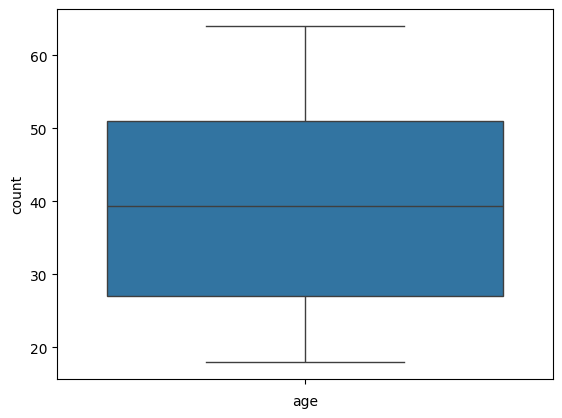

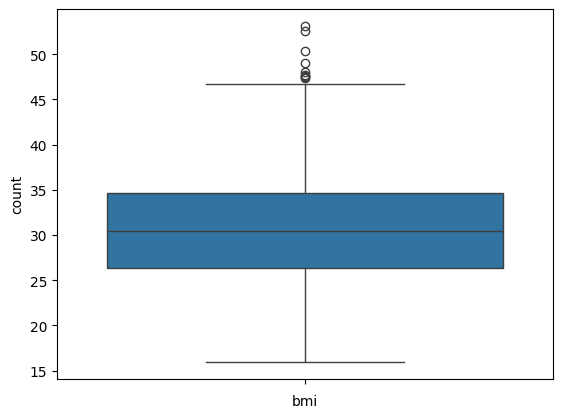

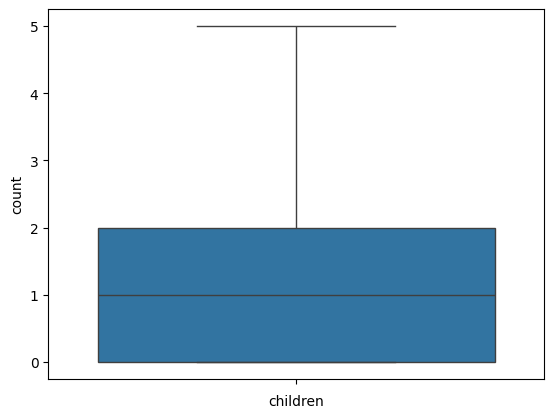

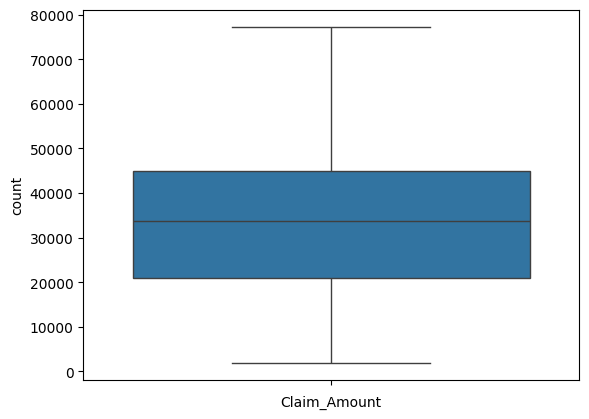

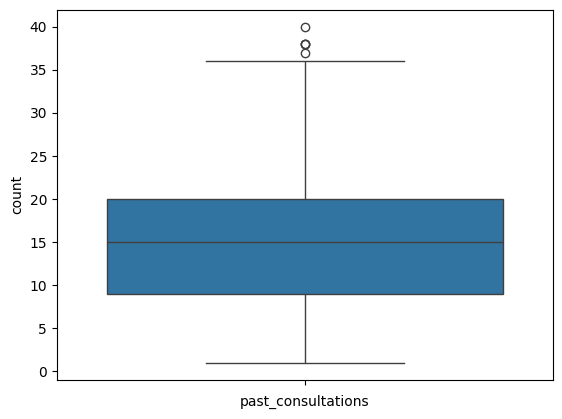

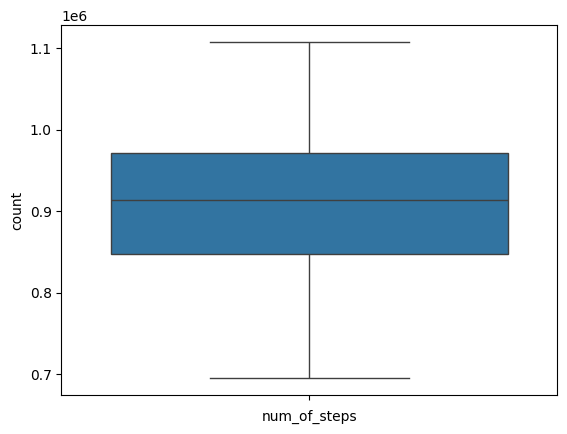

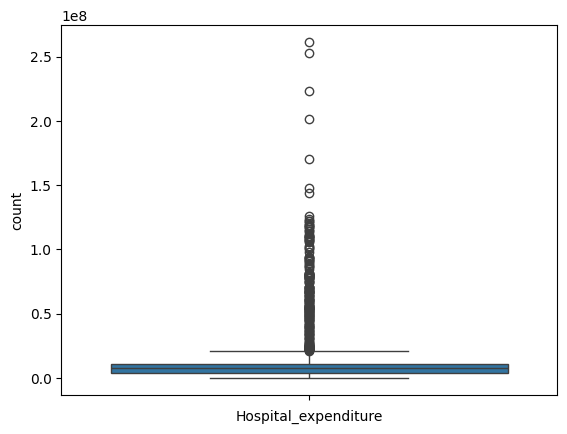

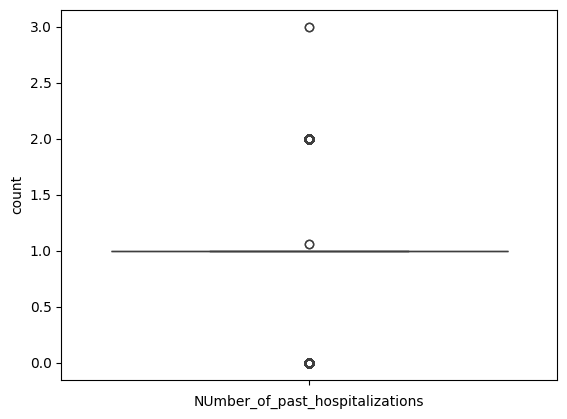

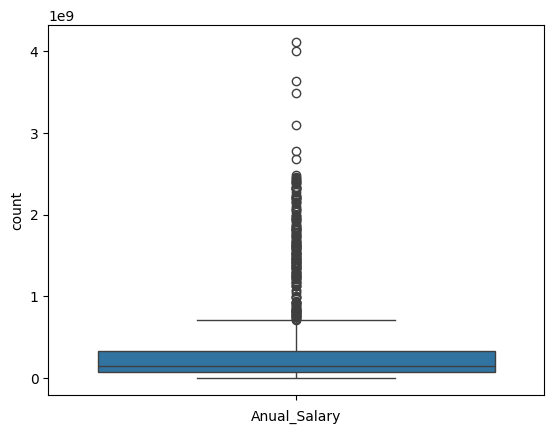

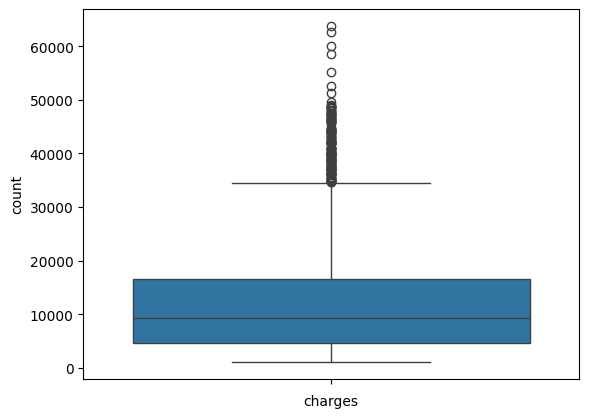

In [61]:
for col in df.columns:
  if df[col].dtypes != 'object':
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()

In [62]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [63]:
outlier_col = ['bmi', 'past_consultations', 'Hospital_expenditure', 'Anual_Salary']

In [64]:
# Method for removing outiers
Q1 = df.bmi.quantile(0.25)
Q3 = df.bmi.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

print(lower_bound, upper_bound)
df = df[(df.bmi>=lower_bound) & (df.bmi<=upper_bound)]

13.803125000000003 47.168124999999996


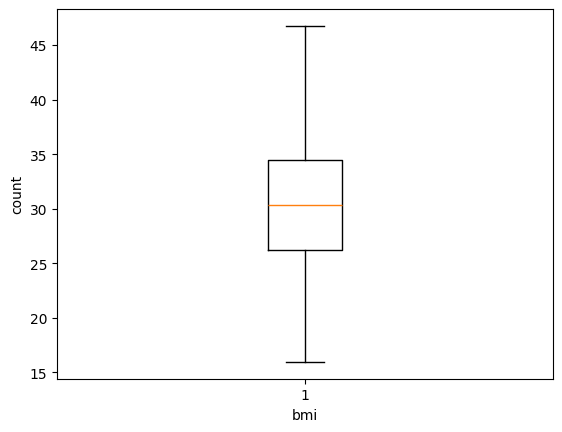

In [65]:
plt.boxplot(df['bmi'])
plt.xlabel('bmi')
plt.ylabel('count')
plt.show()

# Now we have to remove outliers from rest of the columns expect the charges(target column).

In [66]:
for col in outlier_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    df = df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]

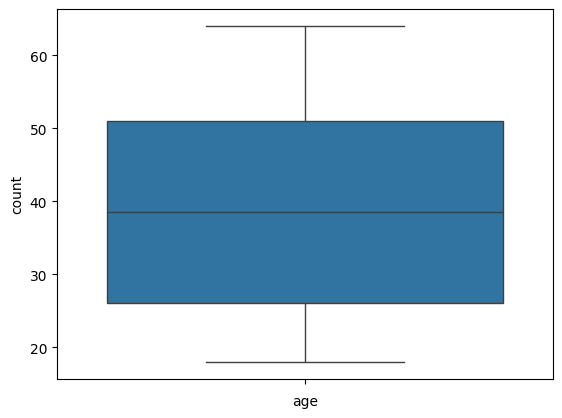

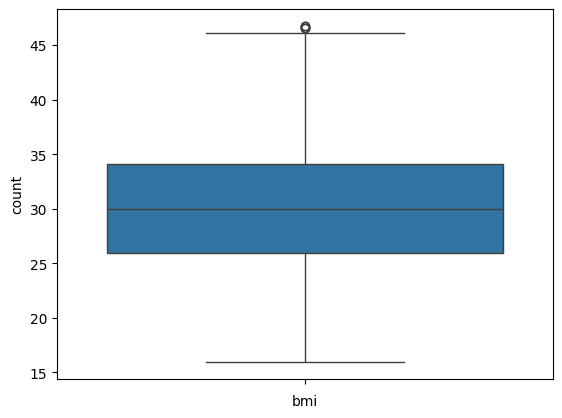

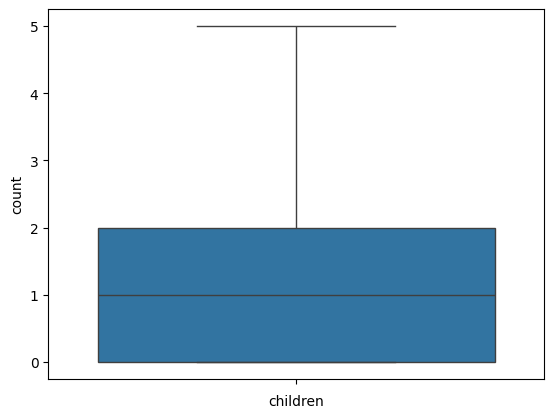

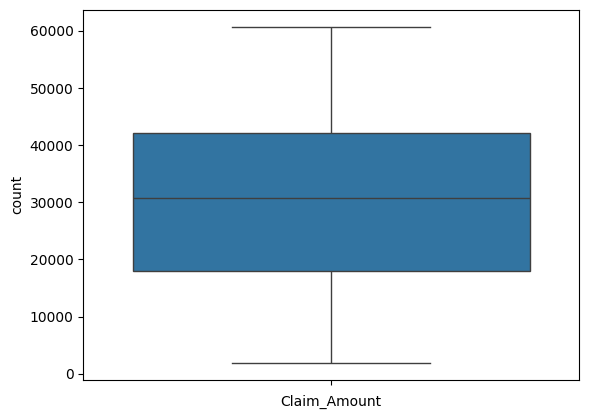

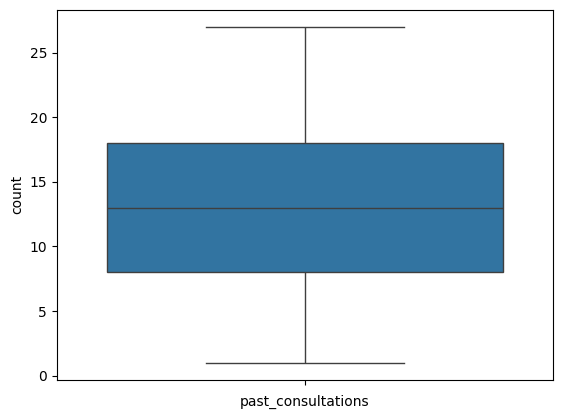

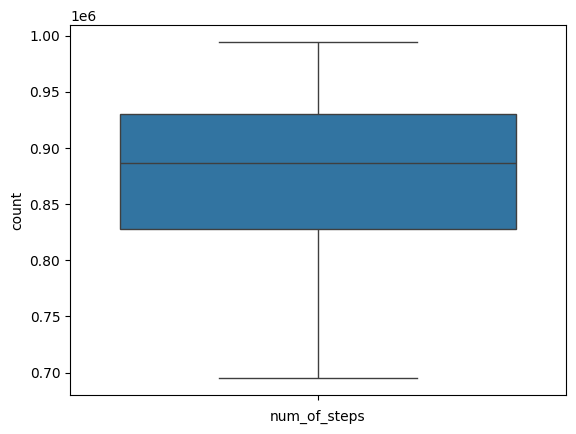

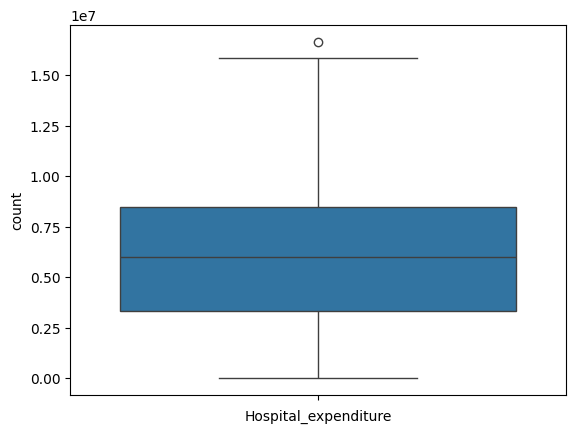

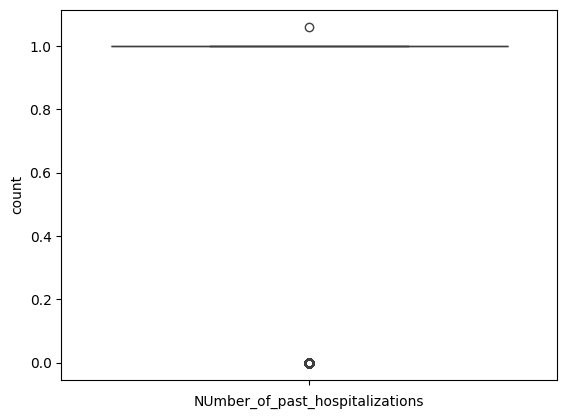

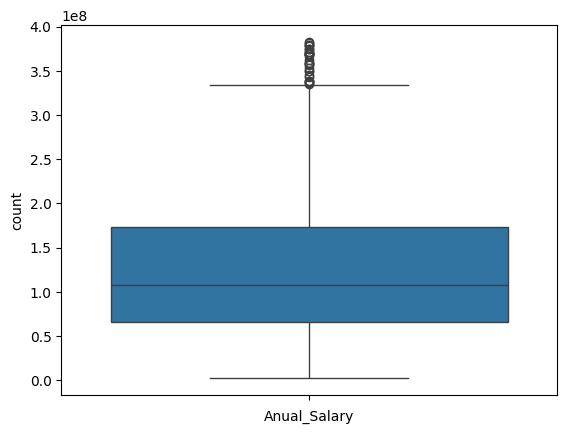

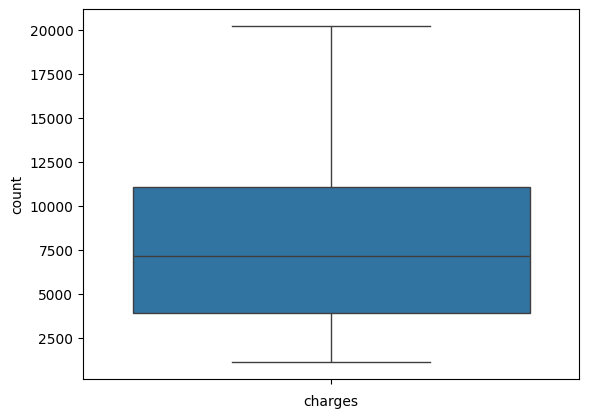

In [67]:
for i in df.columns:
  if df[i].dtype != 'object':
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.ylabel('count')
    plt.show()

In [68]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,29.0,female,27.940,1.0,yes,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,southeast,19107.77960
1048,31.0,male,25.900,3.0,yes,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,southwest,19199.94400
1050,31.0,male,29.810,0.0,yes,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08,southeast,19350.36890
1062,43.0,female,20.045,2.0,yes,21596.43846,10.0,994419.0,1.083030e+07,1.0,3.696849e+08,northeast,19798.05455


# Label Encoding

In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
LE = LabelEncoder()

In [71]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [72]:
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = LE.fit_transform(df[col])

In [73]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,1,23.210,0.0,0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,2,1121.87390
1,18.0,1,30.140,0.0,0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,2,1131.50660
2,18.0,1,33.330,0.0,0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,2,1135.94070
3,18.0,1,33.660,0.0,0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,2,1136.39940
4,18.0,1,34.100,0.0,0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,2,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,29.0,0,27.940,1.0,1,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,2,19107.77960
1048,31.0,1,25.900,3.0,1,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,3,19199.94400
1050,31.0,1,29.810,0.0,1,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08,2,19350.36890
1062,43.0,0,20.045,2.0,1,21596.43846,10.0,994419.0,1.083030e+07,1.0,3.696849e+08,0,19798.05455


# Model Building

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [75]:
X = df.drop(columns = 'charges', axis = 1)
Y = df['charges']

In [76]:
X # Independent Columns

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
0,18.0,1,23.210,0.0,0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,2
1,18.0,1,30.140,0.0,0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,2
2,18.0,1,33.330,0.0,0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,2
3,18.0,1,33.660,0.0,0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,2
4,18.0,1,34.100,0.0,0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1046,29.0,0,27.940,1.0,1,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,2
1048,31.0,1,25.900,3.0,1,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,3
1050,31.0,1,29.810,0.0,1,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08,2
1062,43.0,0,20.045,2.0,1,21596.43846,10.0,994419.0,1.083030e+07,1.0,3.696849e+08,0


In [77]:
 Y # Dependent Column

,charges
0,1121.87390
1,1131.50660
2,1135.94070
3,1136.39940
4,1137.01100
...,...
1046,19107.77960
1048,19199.94400
1050,19350.36890
1062,19798.05455


In [78]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 20)   #train_size = 0.75

In [79]:
x_train   # Training data (questions)

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
1023,45.0,0,31.790,0.000000,0,27727.625370,19.000000,974405.0,1.089321e+07,1.0,3.829703e+08,2
497,38.0,0,19.475,2.000000,0,7182.350763,4.000000,875586.0,4.433380e+06,1.0,7.752061e+07,1
336,35.0,1,27.610,1.000000,0,45580.280500,15.216216,850393.0,6.640575e+05,1.0,5.521018e+07,2
936,63.0,1,28.310,0.000000,0,11614.345710,24.000000,947447.0,1.079871e+07,1.0,2.236671e+08,1
734,47.0,1,28.215,4.000000,0,22128.385460,20.000000,914547.0,1.023975e+07,1.0,1.820611e+08,0
...,...,...,...,...,...,...,...,...,...,...,...,...
998,27.0,0,20.045,3.000000,1,39945.885270,25.000000,959666.0,9.633160e+06,1.0,2.913115e+08,1
395,30.0,1,37.430,1.090773,0,24355.027040,13.000000,861670.0,1.589382e+06,1.0,5.117770e+07,0
930,62.0,1,32.110,0.000000,0,20864.951990,15.000000,952784.0,9.649062e+06,1.0,2.678571e+08,0
273,27.0,1,33.155,2.000000,0,3768.603033,5.000000,827853.0,1.004983e+07,1.0,7.027149e+07,1


In [92]:
y_train   # training data answers

,charges
1023,17929.30337
497,6933.24225
336,4747.05290
936,13770.09790
734,10407.08585
...,...
998,16420.49455
395,5428.72770
930,13555.00490
273,4058.71245


In [81]:
x_test  # Testing data. after building the model we will test the model with this data.

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
63,19.0,0,24.700,0.0,0,3965.606464,7.0,757132.0,5.513272e+06,0.0,2.952277e+07,3
886,57.0,0,38.000,2.0,0,23096.612300,9.0,948055.0,5.633444e+06,1.0,1.972027e+08,3
522,36.0,0,22.135,3.0,0,39832.066670,10.0,874992.0,1.005543e+07,1.0,1.307919e+08,0
197,21.0,1,23.750,2.0,0,48666.903120,16.0,801695.0,7.369025e+05,1.0,7.000701e+07,1
128,20.0,0,28.975,0.0,0,51089.319790,10.0,780330.0,2.945253e+04,0.0,5.750294e+07,1
...,...,...,...,...,...,...,...,...,...,...,...,...
269,22.0,1,19.950,3.0,0,46464.832220,3.0,827067.0,7.843290e+06,1.0,3.423338e+07,0
769,56.0,1,33.725,0.0,0,16543.730140,19.0,939125.0,1.111280e+07,1.0,1.244644e+08,1
715,53.0,1,36.100,1.0,0,27731.372540,8.0,920050.0,2.785092e+06,1.0,1.312519e+08,3
548,44.0,0,25.000,1.0,0,50829.526200,3.0,901139.0,5.902534e+06,1.0,1.001386e+08,3


In [82]:
y_test   # When the model will predict the values for us we will compare those values with y_test

,charges
63,1737.37600
886,12646.20700
522,7228.21565
197,3077.09550
128,2257.47525
...,...
269,4005.42250
769,10976.24575
715,10085.84600
548,7623.51800


In [83]:
linear_model = LinearRegression()

In [84]:
linear_model.fit(x_train, y_train)

LinearRegression()

In [85]:
# Now the model ready so we test the data to check what values my model can predict.
model_predicted = linear_model.predict(x_test)

In [86]:
model_predicted

array([ 1622.59327499, 12243.69987427,  7467.78533011,  2623.37662161,
        3004.54724864,  4835.72357416,  8869.78407746,  8811.22292023,
        6296.94953099, 15307.55491767,  4228.82774042,  6535.54512908,
        1788.77316286,  4217.49722428,  5006.2990741 ,  4184.53942638,
        9225.39064059, 11712.78149453, 12320.58019151,  4938.70174383,
        5755.33351356,  5097.39703286,  1873.37330558,  5950.83655108,
       10486.44286267, 13839.58251142,  6205.40428417,  8727.60353921,
        8809.77660027,  8074.89349417,  2872.99007113,  1723.48430052,
        9635.43988904,  1566.64500122,  6675.73455121,  5839.23743496,
       12778.70369285, 13509.29399489, 13049.69039013,  2945.97580201,
       12389.63061804,  5681.66582139, 12017.35379564,  4051.40666328,
       13904.17854673,  7342.52508401, 11885.96830757, 11412.17809008,
        8821.446138  ,  7452.6735826 , 12494.79136689,  8280.3230479 ,
        6924.33013385,  8483.64115826,  9725.95615757, 10143.41006782,
      

In [87]:
from sklearn.metrics import mean_squared_error, r2_score

In [88]:
mse = mean_squared_error(y_test, model_predicted)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("\nRMSE:", rmse)

MSE: 898557.0250297611

RMSE: 947.9224783861606


In [89]:
print("R2 Score:", r2_score(y_test, model_predicted)*100)

R2 Score: 94.83183311732427


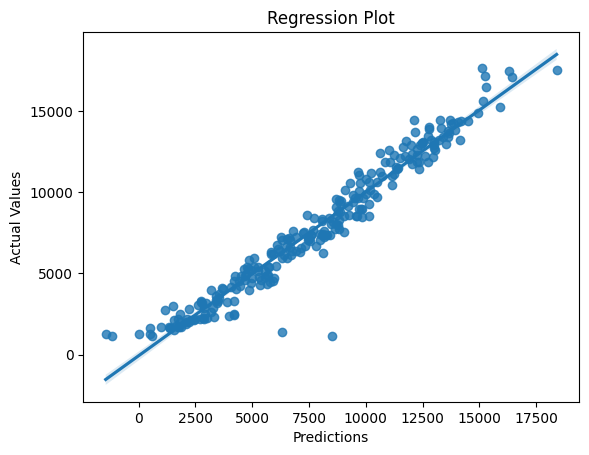

In [90]:
sns.regplot(x=model_predicted,y=y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual Values')
plt.title('Regression Plot')
plt.show()